# An Evolutionary Attempt at the Maximum k-Colorable Subgraph Problem

### Imports

In [59]:
import random
import time
import matplotlib.pyplot as plt
import networkx as nx
import tracemalloc

The above 5 libraries are the main libraries of this implementation.

**random** is used to help in various parts of this implementation.

**time** is used to track the amount of time it will take to run.

**matplotlib** is used for charting the fitnesses of our algorithm over generations.

**networkx** is used for drawing our colored graph of the individual chromosome with the best fitness.

**tracemalloc** is used to track the amount of memory is used to run.

### Parameters

In [60]:
start_time = time.time()
pop_size = 50
generations = 100
mutation_rate = 0.05
k = 4

The parameters required to run the code. 

***start_time*** is used to commence the timer

***pop_size*** is used as the limit of the population size. 50 was standard throughout all research thus this rate will remain the same.

***generations*** is used as the maximum amount of generations that we will iterate through. This value is rather 100 or 2000 throughout all testing.

***mutation_rate*** is the rate of mutation, which varies between rather 0.05 or 0.08 in all testing.

***k*** the number of colors. The k in ***Maximum k-Colorable Subgraph Problem***.

### Graphs

There are multiple graphs of various sizes and connectivity that can be used for evaluation. For best functionality large and complex graphs will not be included in this notebook. Refer to meEvo.py for many dictionary of lists of more graphs.

In [61]:
graph = {
    'A': ['B', 'C'],
    'B': ['A', 'C', 'D'],
    'C': ['A', 'B', 'D', 'E'],
    'D': ['B', 'C', 'E', 'F'],
    'E': ['C', 'D', 'F'],
    'F': ['D', 'E']
}

In [62]:
graph = { 
    'A': ['B', 'C', 'D', 'E', 'F'],
    'B': ['A', 'C', 'D', 'G', 'H'],
    'C': ['A', 'B', 'D', 'I', 'J'],
    'D': ['A', 'B', 'C', 'K', 'L'],
    'E': ['A', 'F', 'G', 'I', 'K'],
    'F': ['A', 'E', 'H', 'J', 'L'],
    'G': ['B', 'E', 'H', 'I', 'L'],
    'H': ['B', 'F', 'G', 'J', 'K'],
    'I': ['C', 'E', 'G', 'J', 'K'],
    'J': ['C', 'F', 'H', 'I', 'L'],
    'K': ['D', 'E', 'H', 'I', 'J'],
    'L': ['D', 'F', 'G', 'J', 'K']
}

In [63]:
graph = {
    'A': ['B', 'D'],
    'B': ['A', 'C', 'E'],
    'C': ['B', 'E'],
    'D': ['A', 'E', 'G'],
    'E': ['D', 'H'],
    'F': ['C', 'I'],
    'G': ['D'],
    'H': ['E', 'I', 'J'],
    'I': ['F', 'H', 'K'],
    'J': ['H'],
    'K': ['I', 'L', 'M'],
    'L': ['K', 'N'],
    'M': ['K', 'N'],
    'N': ['L','M', 'O', 'P'],
    'O': ['N', 'Q'],
    'P': ['N', 'Q'],
    'Q': ['O', 'P', 'R', 'S'],
    'R': ['Q', 'T'],
    'S': ['Q'],
    'T': ['R', 'U', 'V'],
    'U': ['T', 'W'],
    'V': ['T', 'X'],
    'W': ['U', 'Y'],
    'X': ['V', 'Y'],
    'Y': ['X', 'W']
}

### Generate Population

In [64]:
population = []
for i in range(pop_size):
    individual = {}
    for vertex in graph:
        individual[vertex] = random.randint(1, k)
    population.append(individual)
    
def app(): #Required for tracemalloc
    lt = []
    for i in range(0, 100000):
        lt.append(i)

The above code generates our initial population by selecting a random coloring per each individual chromosome.

The app function is a requirement to track the Memory Usage of our algorithm.

### Fitness

In [65]:
def fitness(individual):
    conflicts = 0
    for vertex in graph:
        color = individual[vertex]
        for neighbor in graph[vertex]:
            if individual[neighbor] == color:
                conflicts += 1
    return -conflicts

The fitness of an individual is defined by the amount of adjacent color conflicts that can be found. If there is a color conflict of two adjacent nodes typically it will result in 2 conflicts (one going each way). The function returns the amount of conflicts as a negative number because 0 will always be the maximum fitness score, meaning we need a value less than that for the conflicts.

### Tournament Selection

In [66]:
def selection(population):
    tournament_size = 5
    tournament = random.sample(population, tournament_size)
    tournament.sort(key = lambda x: fitness(x))
    return tournament[-1]

The selection function used is a ***tournament selection*** that will select 5 random participants from the population and sort the participants of the tournament by their fitness, and then return the individual chromosome with the best fitness in the subset.

Helps ensure diversity amongst the population while preventing premature convergence.

### Elitism Selection

In [67]:
def elitism(population):
    population.sort(key = lambda x: fitness(x))
    return population[:int(0.1 * pop_size)]

Inspired by the design of Musa Hindi and Roman Yampolskiy's genetic algorithm with two separate selection methods, I opted to also use a second form of selection.

The ***Elitism Selection*** function sorts the population by their fitnesses and returns only the top 10% of the population so that we can preserve the best solutions thus far. It is used in tandem with the Tournament Selection so that we can keep some of the best individual chromosomes from the previous generation in the next generation.

### 2-Point Crossover

In [68]:
def crossover(parent1, parent2):
    k = 2
    crossover_points = sorted(random.sample(range(len(graph)), k))
    child = {}
    for i in range(len(graph)):
        if i < crossover_points[0]:
            child[list(graph.keys())[i]] = parent1[list(graph.keys())[i]]
        elif i < crossover_points[1]:
            child[list(graph.keys())[i]] = parent2[list(graph.keys())[i]]
        else:
            child[list(graph.keys())[i]] = parent1[list(graph.keys())[i]]
    return child

This crossover function is a ***k-Point Crossover*** implementation, however after seeing the strength of 2-group genetic algorithms in the Maximum k-Colorable Subgraph Problem k was elected to stay 2 for testing. We assign two random crossover points and sort them in ascending order. A child will then inherit from a parent depending on where  in the graph it is. If the node is within the 2 points then it will inherit from the second parent, otherwise it will always be from the first parent.

Inherits fundamentals of the Grouping Genetic Algorithm in regards to it's crossover, without using the Object:Group structure so we can improve solution quality without requiring the additional memory usage of creating and comparing groupings.

### Mutation

In [69]:
def mutation(individual):
    vertex = random.choice(list(individual.keys()))
    individual[vertex] = random.randint(1, k)
    return individual

#"""def mutation(individual, mutation_rate):
 #   vertex = random.choice(list(individual.keys()))
  #  if random.random() < mutation_rate:
   #     individual[vertex] = random.randint(1, k) 
    #return individual """
    
#in algorithm:
#for i in range(num_generations):
    #if i % 10 == 0:
        #if improvement_rate < 0.01:
            #mutation_prob *= 1.1 
        #elif improvement_rate > 0.1:
            #mutation_prob /= 1.1


The final operator of our algorithm. This mutation simply selects a random vertex from an individual chromosome, assigns a new random color to it, and returns the mutated individual.

Though using an adaptive mutation function was the original goal to ensure better results in scenarios where the fitness was not near 0, the adaptive version did not make any noticeable difference in processing speed, amount of generations to find optimal solution, nor memory usage.

### General Algorithm and Plotting Data

In [70]:
tracemalloc.start()
best_fitnesses = []
for iteration in range(generations):
    parents = [selection(population) for i in range(pop_size)]
    offspring = [crossover(parents[i], parents[i+1]) for i in range(0, pop_size, 2)]
    offspring = [mutation(individual) for individual in offspring]
    elite_population = elitism(population)
    population = elite_population + offspring
    fitnesses = [fitness(individual) for individual in population]
    best_fitness = max(fitnesses)
    best_fitnesses.append(best_fitness)
    
    
    if best_fitness == 0: 
        best_individual = population[fitnesses.index(best_fitness)]
        print("Local Optimal Solution found on iteration: ", iteration)
        print("Solution runtime: %s seconds " % (time.time() - start_time))
        x, y = tracemalloc.get_traced_memory()
        print("Memory Block Usage: ", y)
        print("Best Fitness: ", best_fitness)
        print("Maximum Subgraph Size: ", len(graph))
        print(best_individual)
        break
    elif iteration == generations-1:
        best_individual = population[fitnesses.index(best_fitness)]
        print("All", iteration, "Iterations Ran")
        print("Solution Runtime: %s seconds " % (time.time() - start_time))
        x, y = tracemalloc.get_traced_memory()
        print("Memory Block Usage: ", y)
        print("Solution Fitness: ", best_fitness) #Removing half the amount of listed nodes would get the Maximum Subgraph Size
        print("\nWarning: Solution Fitness is less than 0 meaning Color Collision has been detected.\n")
        print(best_individual)
        size = len(graph)+(best_fitness/2)
        if(best_fitness%2!=0):
            size -= .5
        print("Best Fitness: ", best_fitness)
        print("Maximum Subgraph Size: ", size)
        break

Local Optimal Solution found on iteration:  2
Solution runtime: 0.18815922737121582 seconds 
Memory Block Usage:  71646
Best Fitness:  0
Maximum Subgraph Size:  25
{'A': 2, 'B': 1, 'C': 2, 'D': 1, 'E': 4, 'F': 4, 'G': 2, 'H': 2, 'I': 3, 'J': 4, 'K': 4, 'L': 1, 'M': 2, 'N': 3, 'O': 1, 'P': 1, 'Q': 4, 'R': 2, 'S': 3, 'T': 1, 'U': 4, 'V': 3, 'W': 1, 'X': 1, 'Y': 3}


The code above simply brings together everyone of our functions as well as prints out information about the run.
***tracemalloc*** starting allows for tracking of resources used in the algorithm.

We then go through the basic steps of taking a population of parents and creating better offspring. 

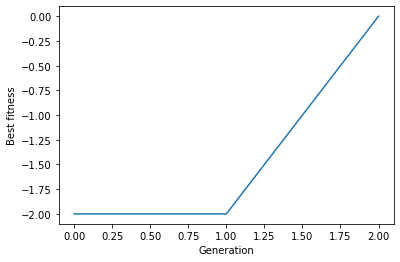

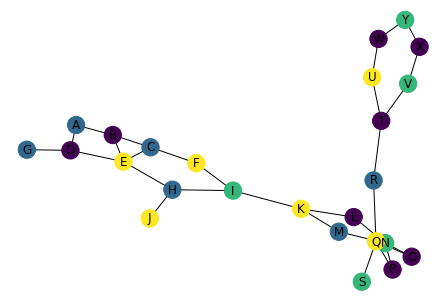

In [72]:
plt.plot(best_fitnesses)
plt.xlabel('Generation')
plt.ylabel('Best fitness')
plt.show()

nx_graph = nx.Graph()
nx_graph.add_nodes_from(graph.keys())
for node, neighbors in graph.items():
    for neighbor in neighbors:
        nx_graph.add_edge(node, neighbor)

node_colors = [best_individual[node] for node in nx_graph.nodes()]
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, node_color=node_colors, with_labels=True)
plt.show()

tracemalloc.stop()

Finally we have the ***matplotlib*** chart of fitnesses throughout the generations as well as using ***networkx*** to show the colored graph resulted from a best fitness solution.

***tracemalloc*** is then stopped to properly end our program.

***Networkx has an issue with Jupyter Notebook, thus the networkx coloring must be displayed by running myEvo.py***

## Results

To best demonstrate how this algorithm performs, we will compare a generic genetic algorithm to our algorithm. We will then compare our algorithm to the algorithm created by Hindi and Yampolskiy. Unfortunately Hindi and Yampolskiy's implementation used  much more sophisticated (large, more connected) graphs than our algorithm, and thus we will only be able to show one main comparison, but the point gets across quite easily how much further optimized their approach is.

#### Graph Size = 12, K = 4 (all nodes have 5 adjacent nodes), population size = 50, generations = 100

### Generic Approach:
<img src="generic1-1.png" width="300" title="generic">
<img src="generic1-2.png" width="300" title="generic2">
<img src="generic1-3.png" width="300" title="generic3">

### Developed Approach:
<img src="myEvo1-1.png" width="300" title="myEvo">
<img src="myEvo1-2.png" width="300" title="myEvo2">
<img src="myEvo1-3.png" width="300" title="myEvo3">

#### Graph Size = 25, K = 4, population size = 50, generations = 100

### Generic Approach:
<img src="generic2-1.png" width="300" title="generic22">
<img src="generic2-2.png" width="300" title="generic23">

### Developed Approach:
<img src="myEvo2-1.png" width="300" title="myEvo">
<img src="myEvo2-2.png" width="300" title="myEvo2">

#### Graph Size = 36, K = 7 (highly connected graph), population size = 50, generations = 20,000

### Generic Approach:
<img src="generic3-1.png" width="300" title="generic32">
<img src="generic3-2.png" width="300" title="generic33">

### Hindi and Yampolskiy's Approach:
<img src="queen6Original1.png" width="300" title="queen">
<img src="queen6Original2.png" width="300" title="queen2">
<img src="queen6Original3.png" width="300" title="queen3">

### Developed Approach:
<img src="queens6Results1.png" width="300" title="myqueen">
<img src="queens6Results2.png" width="300" title="myqueen2">
<img src="queens6Results3.png" width="600" title="myqueen3">


As we can see, the developed algorithm is able to significantly outperform the generic algorithm without much effort, and although it was able to create the same fitness as Hindi and Yampolski's, they were able to defeat our algorithm significantly in processing time as well as by beating us to finding the solution by approximately 200 generations.

## Conclusion

Although we were able to create a simple Evolutionary Algorithm that is able to complete with other modern approaches, however this is not the best algorithm available. It is able to give improved solutions over the span of an assigned amount of generations, however it is still able to get stuck on local optimum solutions more than the design of Hindi and Yampolski.

#### Developed Approach works well with connected graphs up to 150 nodes and highly connected graphs up to 40 nodes:
<img src="fin1.png" width="300" title="new1">
<img src="fin2.png" width="300" title="new2">
<img src="fin3.png" width="600" title="new3">

To improve upon this solution the best first step would be to find a more suitable adaptive mutation function to ensure that mutation is happening more often as we begin to stop improving and looking into other implementations of crossover to see what can be done.